# Terrorism Analysis Task 4 at The Spark Foundation Intern

## You Can Find BI Report : 
## https://app.powerbi.com/reportEmbed?reportId=3d14f22c-1b27-4844-ab55-b9229ab8c8b4&autoAuth=true&ctid=6845d6ca-1ec5-4c0e-9e9d-34130ce0a0b8

## You Can Find Dataset : https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

## Describtion of Feature 
* link of describtion : https://start.umd.edu/gtd/downloads/Codebook.pdf
###### extended
* 1 = "Yes" The duration of an incident extended more than 24 hours.
* 0 = "No" The duration of an incident extended less than 24 hours.
###### country_txt
* This field identifies the country or location where the incident occurred.
###### country 
* These codes are also used for the target/victim nationality fields
###### region_txt 
* This field identifies the region in which the incident occurred
###### region 
* The regions are divided into the following 12 categories, and dependent on the country coded
###### provstate 
* This variable records the name (at the time of event) of the 1st order subnational administrative region in which the event occurs.
###### city 
* This field contains the name of the city, village, or town
###### specificity 
* This field identifies the geospatial resolution of the latitude and longitude fields
###### doubtterr
* 1 = "Yes" There is doubt as to whether the incident is an act of terrorism.
* 0 = "No" There is essentially no doubt as to whether the incident is an act of terrorism.
###### multiple
* 1 = "Yes" The attack is part of a multiple incident.
* 0 = "No" The attack is not part of a multiple incident.
###### success
* 1 = "Yes" The incident was successful.
* 0 = "No" The incident was not successful.
###### suicide
* 1 = "Yes" The incident was a suicide attack.
* 0 = "No" There is no indication that the incident was a suicide attack.
###### attacktype1_txt
* This field captures the general method of attack
###### targtype1_txt
* The target/victim type field captures the general type of target/victim
###### targsubtype1_txt
* The target subtype variable captures the more specific target category and provides the next level of designation for each target type
###### natlty1_txt
* This is the nationality of the target that was attacked
###### gname
* This field contains the name of the group that carried out the attack
###### guncertain1
* 1 = "Yes" The perpetrator attribution(s) for the incident are suspected.
* 0 = "No" The perpetrator attribution(s) for the incident are not suspected.
###### individual
* 1 = "Yes" The perpetrator(s) were identified by name (or specific unnamed minors) and not known to be affiliated with a group or organization.
* 0 = "No" The perpetrator(s) were not identified as unaffiliated individuals (i.e. theperpetrators were either not identified by name, or were known to be affiliated with a group or organization).
###### weaptype1_txt
* Up to four weapon types are recorded for each incident
###### weapsubtype1_txt
* This field records a more specific value for most of the Weapon Types identified immediately above. 
###### nkill
* This field stores the number of total confirmed fatalities for the incident.
###### nwound
* This field records the number of confirmed non-fatal injuries to both perpetrators and victims. It follows the conventions of the “Total Number of Fatalities” field described above
###### property
* 1 = "Yes" The incident resulted in property damage.
* 0 = "No" The incident did not result in property damage.
* -9 = "Unknown" It is unknown if the incident resulted in property damage.
###### ishostkid 
* 1 = "Yes" The victims were taken hostage or kidnapped.
* 0 = "No" The victims were not taken hostage or kidnapped.
* -9 = "Unknown" It is unknown if the victims were taken hostage or kidnapped.
###### dbsource
* This field identifies the original data collection effort in which each event was recorded.
###### INT_LOG 
* 1 = "Yes" The attack was logistically international; the nationality of the perpetrator group differs from the location of the attack. If the perpetrator group is multinational, the attack is logistically international if all of the group’s nationalities differ from the location of the attack.
* 0 = "No" The attack was logistically domestic; the nationality of the perpetrator group is the same as the location of the attack. If the perpetrator group is multinational, the attack is logistically domestic if any of the group’s nationalities is the same as the location of the attack.
* -9 = "Unknown" It is unknown if the attack was logistically international or domestic; the nationality of the perpetrator group is unknown.
###### INT_IDEO 
* 1 = "Yes" The attack was ideologically international; the nationality of the perpetrator group differs from the nationality of the target(s)/victim(s). If the perpetrator group or target is multinational, the attack is ideologically international. 58 GLOBAL TERRORISM DATABASE CODEBOOK ©UNIVERSITY OF MARYLAND AUGUST 2021
* 0 = "No" The attack was ideologically domestic; any and all nationalities of the perpetrator group are the same as the nationalities of the target(s)/victim(s).
* -9 = "Unknown" It is unknown if the attack was logistically international or domestic; the nationality of the perpetrator group or the nationality of the target/victim is unknown
###### INT_MISC
* 1 = "Yes" The attack was miscellaneous international; the location of the attack differs from the nationality of the target(s)/victim(s).
* 0 = "No" The attack was miscellaneous domestic; the location of the attack is the same as the nationalities of the target(s)/victim(s).
* -9 = "Unknown" It is unknown if the attack was miscellaneous international or domestic; the nationality of target/victim is unknown.
###### INT_ANY
* 1 = "Yes" The attack was international on any of the dimensions described above (logistically, ideologically, miscellaneous)
* 0 = "No" The attack was domestic on all of the dimensions described above (logistically, ideologically, miscellaneous);
* -9 = "Unknown" It is unknown if the attack was international or domestic; the value for one or more dimensions is unknown. 

### Import Helper Libraries 

In [364]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from sklearn.impute import SimpleImputer

In [365]:
warnings.filterwarnings('ignore')

In [366]:
sns.set_theme(context = 'notebook' , style = 'whitegrid'  , palette = 'Set1')

### Read DataSet & Understand It

In [367]:
df = pd.read_csv('globalterrorismdb_0718dist.csv' , encoding = 'ISO-8859-1')

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### Drop Columns That Have High Percentage Of Missing Records 

In [369]:
null_per = df.isnull().mean()*100

In [370]:
col_to_drop = [col for col in null_per.index if null_per[col] > 27]
len(col_to_drop)

87

In [371]:
df.drop(col_to_drop , inplace = True , axis = 1 )

In [372]:
df.duplicated().sum()

0

In [373]:
df.isnull().mean()*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
target1              0.350045
natlty1              0.858050
natlty1_txt          0.858050
gname                0.000000
guncertain

### Drop Null Records That With Low Percentage Of Missing 

In [374]:
row_to_drop = [col for col in null_per.index if null_per[col] < 11]
len(row_to_drop)

45

In [375]:
df.dropna(subset = row_to_drop , axis = 0 , inplace = True)

In [376]:
df.reset_index(inplace = True , drop = True)

### Check Data Info For Missing Rows & Show DataTypes Representation

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149355 entries, 0 to 149354
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           149355 non-null  int64  
 1   iyear             149355 non-null  int64  
 2   imonth            149355 non-null  int64  
 3   iday              149355 non-null  int64  
 4   extended          149355 non-null  int64  
 5   country           149355 non-null  int64  
 6   country_txt       149355 non-null  object 
 7   region            149355 non-null  int64  
 8   region_txt        149355 non-null  object 
 9   provstate         149355 non-null  object 
 10  city              149355 non-null  object 
 11  latitude          149355 non-null  float64
 12  longitude         149355 non-null  float64
 13  specificity       149355 non-null  float64
 14  vicinity          149355 non-null  int64  
 15  crit1             149355 non-null  int64  
 16  crit2             14

In [378]:
df.isnull().mean()*100

eventid              0.000000
iyear                0.000000
imonth               0.000000
iday                 0.000000
extended             0.000000
country              0.000000
country_txt          0.000000
region               0.000000
region_txt           0.000000
provstate            0.000000
city                 0.000000
latitude             0.000000
longitude            0.000000
specificity          0.000000
vicinity             0.000000
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000000
multiple             0.000000
success              0.000000
suicide              0.000000
attacktype1          0.000000
attacktype1_txt      0.000000
targtype1            0.000000
targtype1_txt        0.000000
targsubtype1         0.000000
targsubtype1_txt     0.000000
corp1               21.588832
target1              0.000000
natlty1              0.000000
natlty1_txt          0.000000
gname                0.000000
guncertain

### Impute Some Missing Records 

In [379]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [380]:
df[['corp1' , 'weapsubtype1_txt']] = imputer.fit_transform(df[['corp1' , 'weapsubtype1_txt']])

<AxesSubplot:xlabel='weapsubtype1', ylabel='Density'>

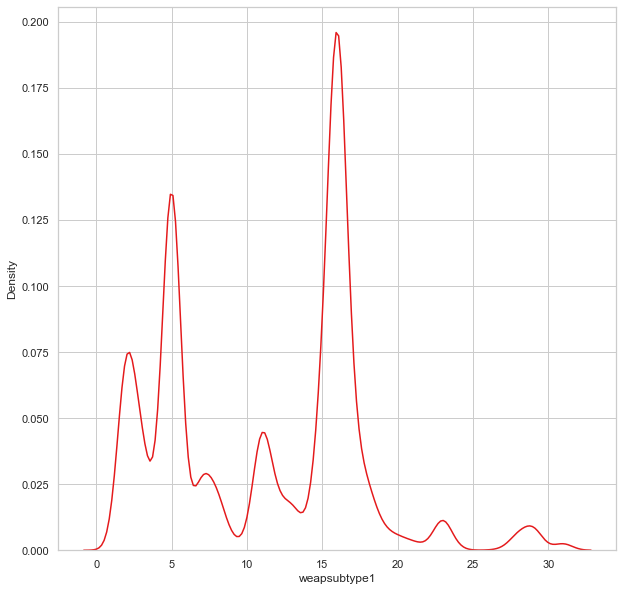

In [381]:
sns.kdeplot(df['weapsubtype1'])

In [382]:
imputer = SimpleImputer(strategy = 'median')

In [383]:
df['weapsubtype1'] = imputer.fit_transform(df[['weapsubtype1']])

In [384]:
df.isnull().mean()*100

eventid             0.0
iyear               0.0
imonth              0.0
iday                0.0
extended            0.0
country             0.0
country_txt         0.0
region              0.0
region_txt          0.0
provstate           0.0
city                0.0
latitude            0.0
longitude           0.0
specificity         0.0
vicinity            0.0
crit1               0.0
crit2               0.0
crit3               0.0
doubtterr           0.0
multiple            0.0
success             0.0
suicide             0.0
attacktype1         0.0
attacktype1_txt     0.0
targtype1           0.0
targtype1_txt       0.0
targsubtype1        0.0
targsubtype1_txt    0.0
corp1               0.0
target1             0.0
natlty1             0.0
natlty1_txt         0.0
gname               0.0
guncertain1         0.0
individual          0.0
weaptype1           0.0
weaptype1_txt       0.0
weapsubtype1        0.0
weapsubtype1_txt    0.0
nkill               0.0
nwound              0.0
property        

### Drop Uneedes Columns 
* Majority of them represent code of country or city etc...

In [386]:
df.drop(['eventid' , 'country' , 'region' , 'crit1' , 'crit2' , 'crit3' , 'attacktype1' , 'targtype1' , 'targsubtype1' , 
        'natlty1' , 'weaptype1' , 'weapsubtype1' , 'specificity' , 'provstate' , 'dbsource'] , axis = 1 , inplace = True)

### Make Some Univariate Analysis To Understand Feature & See Different Categories Of Each One 

In [387]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'city', 'latitude', 'longitude', 'vicinity', 'doubtterr', 'multiple',
       'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1_txt', 'weapsubtype1_txt',
       'nkill', 'nwound', 'property', 'ishostkid', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [388]:
df['iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

<AxesSubplot:xlabel='count', ylabel='iyear'>

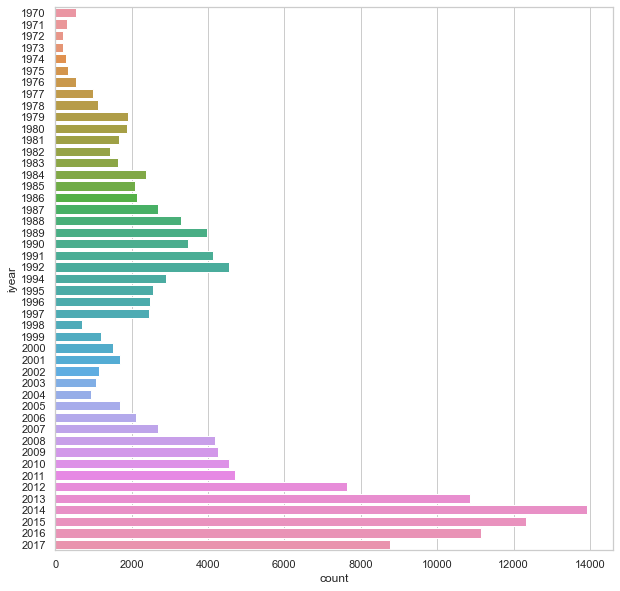

In [389]:
sns.countplot(y = df['iyear'])

In [390]:
df['imonth'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

<AxesSubplot:xlabel='imonth', ylabel='count'>

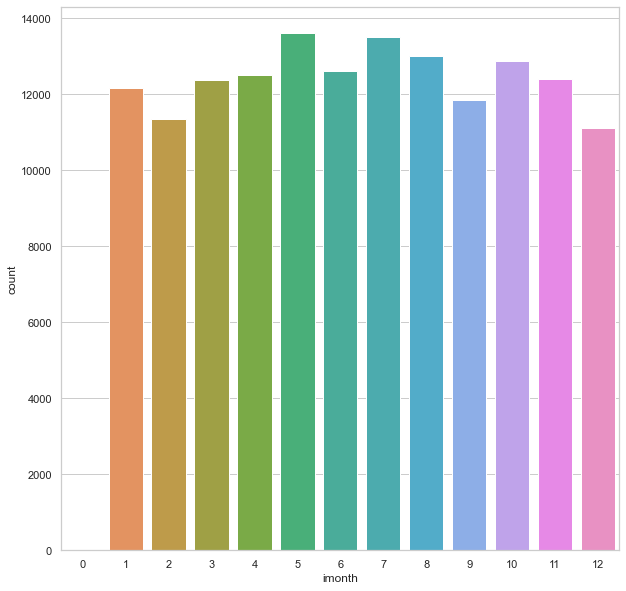

In [391]:
sns.countplot(x = df['imonth'])

In [392]:
df['iday'].unique()

array([ 0,  1,  2,  3,  6,  8,  9, 12, 13, 14, 15, 19, 20, 21, 22, 25, 26,
       27, 28, 30, 31,  7, 16, 17, 23, 24,  4,  5, 10, 11, 29, 18],
      dtype=int64)

In [393]:
df['extended'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='extended', ylabel='count'>

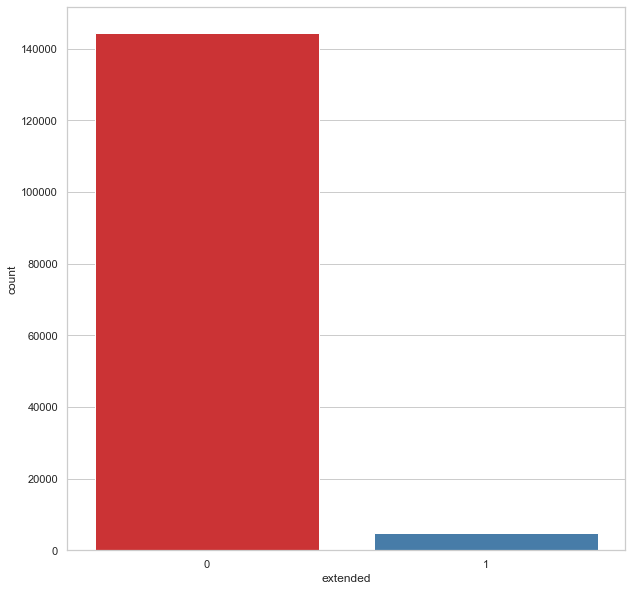

In [394]:
sns.countplot(df['extended'])

In [395]:
sorted(df['country_txt'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Germany (GDR)',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guadeloupe',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Hait

In [396]:
df['region_txt'].unique()

array(['North America', 'Southeast Asia', 'South America',
       'Western Europe', 'Central America & Caribbean',
       'Middle East & North Africa', 'Eastern Europe',
       'Australasia & Oceania', 'South Asia', 'Sub-Saharan Africa',
       'East Asia', 'Central Asia'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='region_txt'>

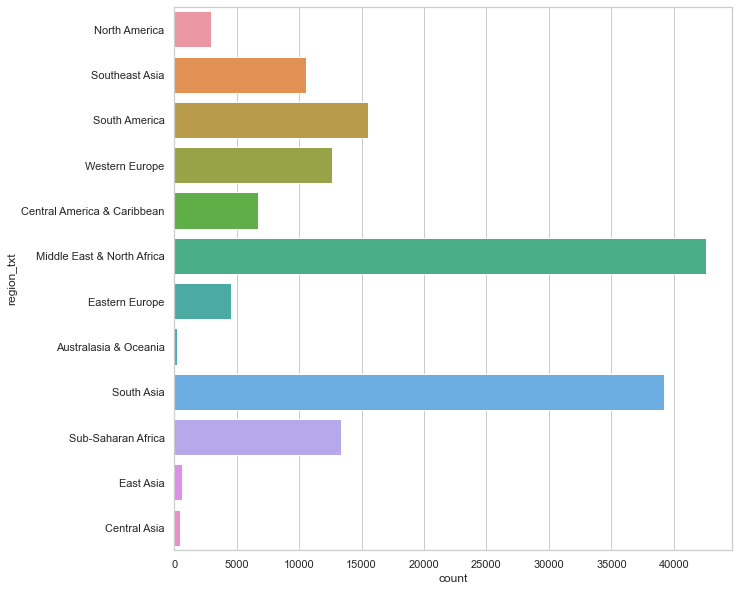

In [397]:
sns.countplot(y = df['region_txt'])

In [398]:
len(df['city'].unique())

30932

In [399]:
df['vicinity'].unique()

array([ 0,  1, -9], dtype=int64)

<AxesSubplot:xlabel='vicinity', ylabel='count'>

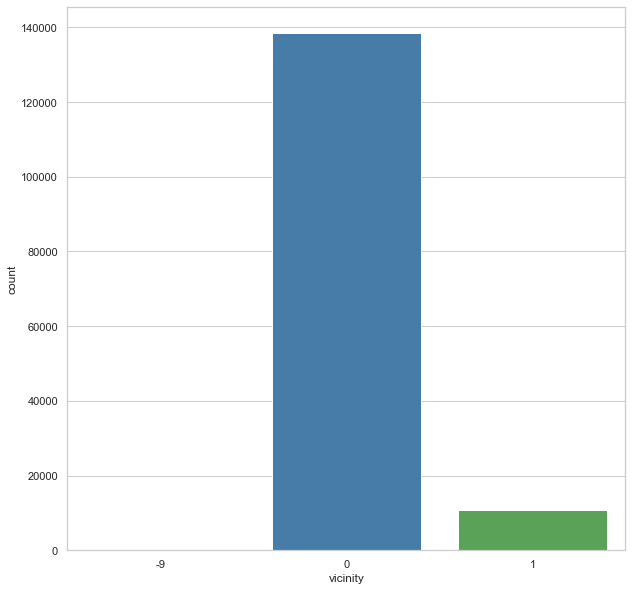

In [400]:
sns.countplot(df['vicinity'])

In [401]:
df['doubtterr'].unique()

array([ 0.,  1., -9.])

<AxesSubplot:xlabel='doubtterr', ylabel='count'>

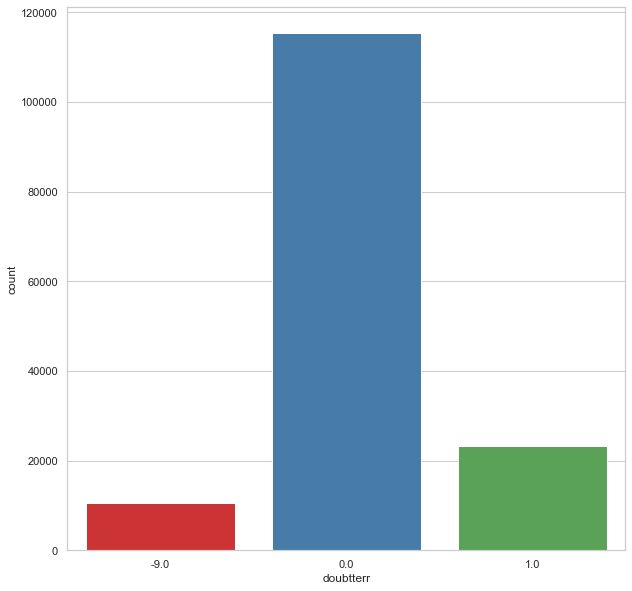

In [402]:
sns.countplot(df['doubtterr'])

In [403]:
df['multiple'].unique()

array([0., 1.])

<AxesSubplot:xlabel='multiple', ylabel='count'>

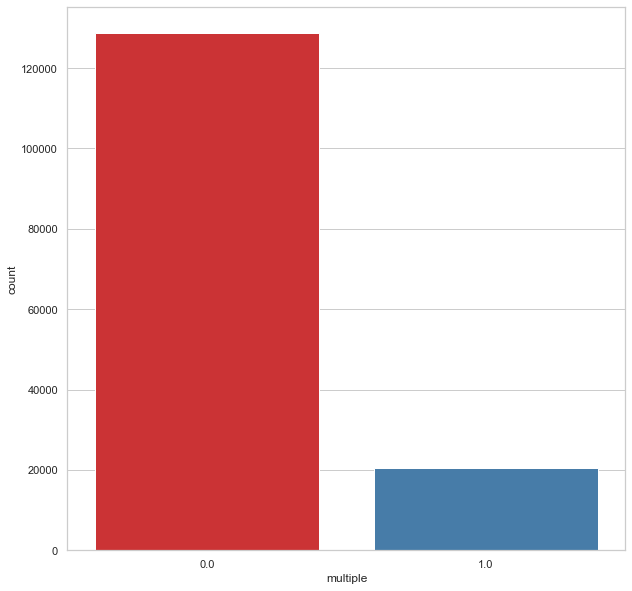

In [404]:
sns.countplot(df['multiple'])

In [405]:
df['success'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='success', ylabel='count'>

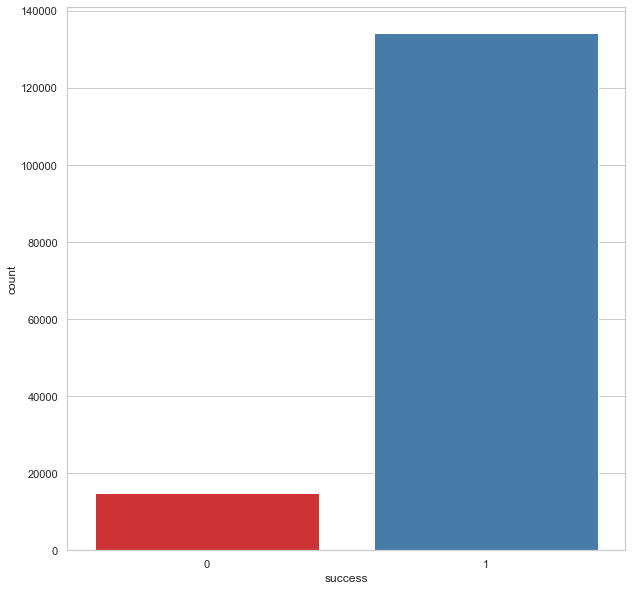

In [406]:
sns.countplot(df['success'])

In [407]:
df['suicide'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='suicide', ylabel='count'>

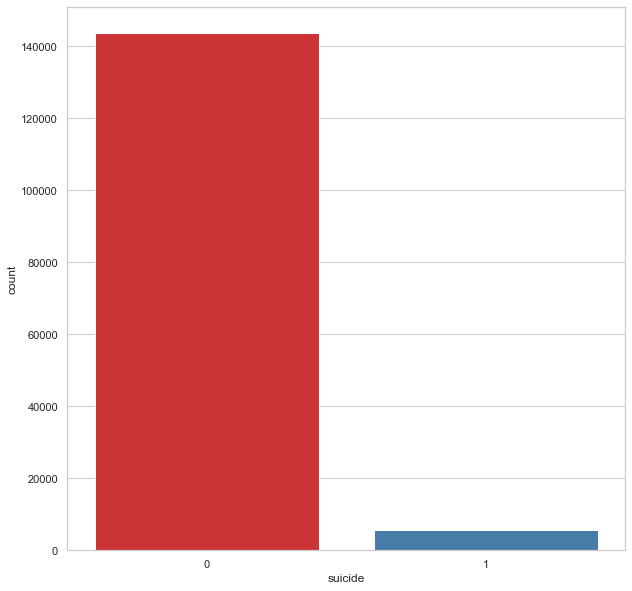

In [408]:
sns.countplot(df['suicide'])

In [409]:
df['attacktype1_txt'].unique()

array(['Hostage Taking (Kidnapping)', 'Assassination', 'Armed Assault',
       'Bombing/Explosion', 'Facility/Infrastructure Attack', 'Hijacking',
       'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='attacktype1_txt'>

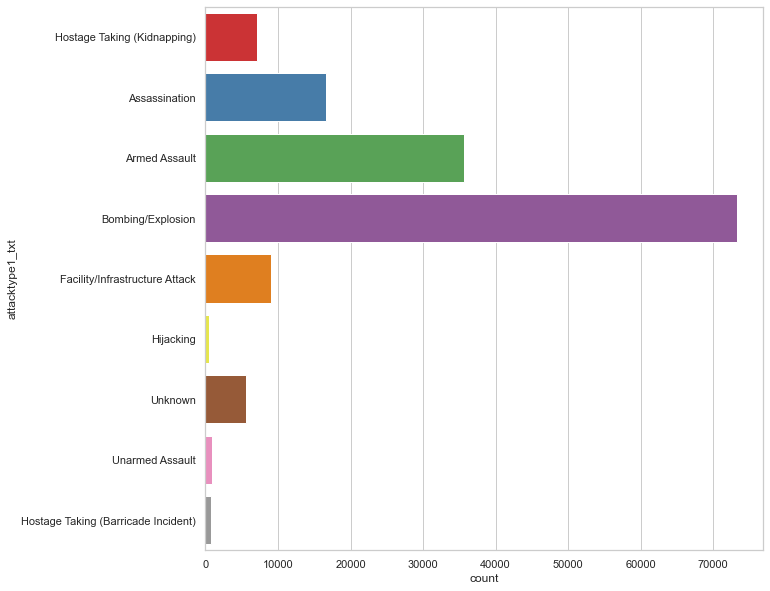

In [410]:
sns.countplot(y = df['attacktype1_txt'])

In [411]:
df['targtype1_txt'].unique()

array(['Government (Diplomatic)', 'Journalists & Media', 'Police',
       'Utilities', 'Military', 'Government (General)',
       'Airports & Aircraft', 'Business', 'Educational Institution',
       'Violent Political Party', 'Private Citizens & Property',
       'Religious Figures/Institutions', 'Transportation', 'NGO',
       'Telecommunication', 'Terrorists/Non-State Militia',
       'Food or Water Supply', 'Tourists', 'Maritime', 'Abortion Related',
       'Other'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='targtype1_txt'>

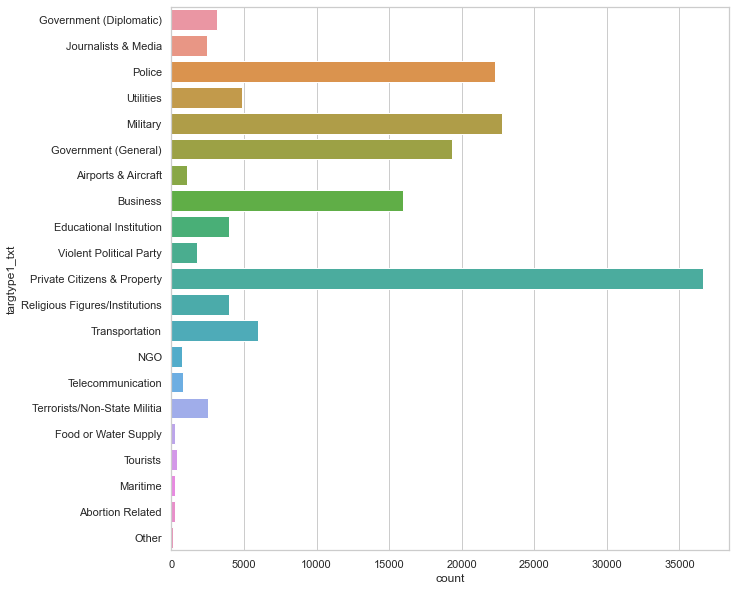

In [412]:
sns.countplot(y = df['targtype1_txt'])

In [413]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'city', 'latitude', 'longitude', 'vicinity', 'doubtterr', 'multiple',
       'success', 'suicide', 'attacktype1_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'gname',
       'guncertain1', 'individual', 'weaptype1_txt', 'weapsubtype1_txt',
       'nkill', 'nwound', 'property', 'ishostkid', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [414]:
len(df['targsubtype1_txt'].unique())

112

In [415]:
len(df['corp1'].unique())

28970

In [416]:
len(df['target1'].unique())

73365

In [417]:
df['natlty1_txt'].unique()

array(['Belgium', 'United States', 'Uruguay', 'Great Britain',
       'Venezuela', 'Puerto Rico', 'Germany', 'Austria', 'Switzerland',
       'Ethiopia', 'Japan', 'Egypt', 'Paraguay', 'Soviet Union', 'China',
       'Israel', 'West Bank and Gaza Strip', 'Argentina', 'Philippines',
       'Multinational', 'Northern Ireland', 'Brazil', 'Haiti',
       'Dominican Republic', 'South Africa', 'Portugal', 'Greece',
       'Yugoslavia', 'Rhodesia', 'Ivory Coast', 'International', 'Canada',
       'Iran', 'Poland', 'Sweden', 'Turkey', 'Spain', 'Russia', 'Iraq',
       'Cuba', 'France', 'Jordan', 'Chile', 'Netherlands', 'Italy',
       'Hong Kong', 'Yemen', 'Syria', 'Colombia', 'New Zealand', 'India',
       'Algeria', 'Peru', 'Czechoslovakia', 'Saudi Arabia', 'Mexico',
       'Denmark', 'West Germany (FRG)', 'Bahamas', 'Bolivia',
       'El Salvador', 'Botswana', 'Guatemala', 'Lebanon', 'North Korea',
       'Albania', 'United Kingdom', 'Nicaragua', 'Kenya', 'Pakistan',
       'Cyprus', 'Panama

In [418]:
df['gname'].unique()# name of the group that carried out the attack 

array(['23rd of September Communist League', 'Unknown',
       'Black Nationalists', ..., 'Fatoni Warriors',
       'Minorities of Metropolitan Attacks', 'Baloch Republican Party'],
      dtype=object)

In [419]:
df['guncertain1'].unique()

array([0., 1.])

<AxesSubplot:xlabel='guncertain1', ylabel='count'>

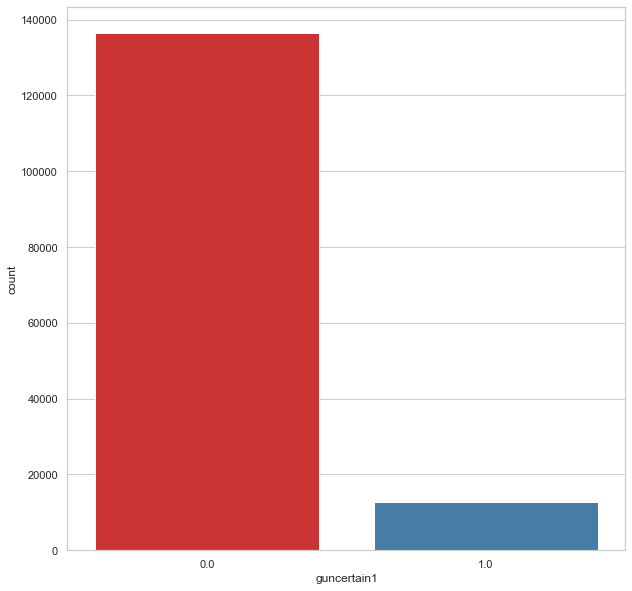

In [420]:
sns.countplot(df['guncertain1'])

In [421]:
df['individual'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='individual', ylabel='count'>

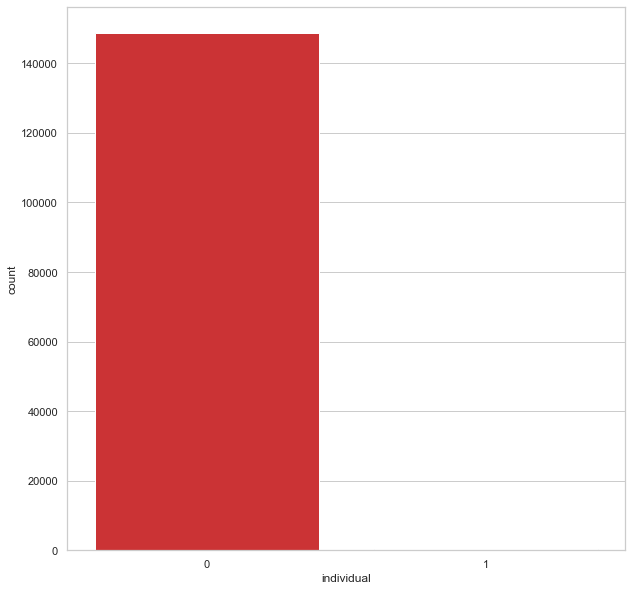

In [422]:
sns.countplot(df['individual'])

In [423]:
df['weaptype1_txt'].unique()

array(['Unknown', 'Firearms', 'Explosives', 'Incendiary', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

<AxesSubplot:xlabel='count', ylabel='weaptype1_txt'>

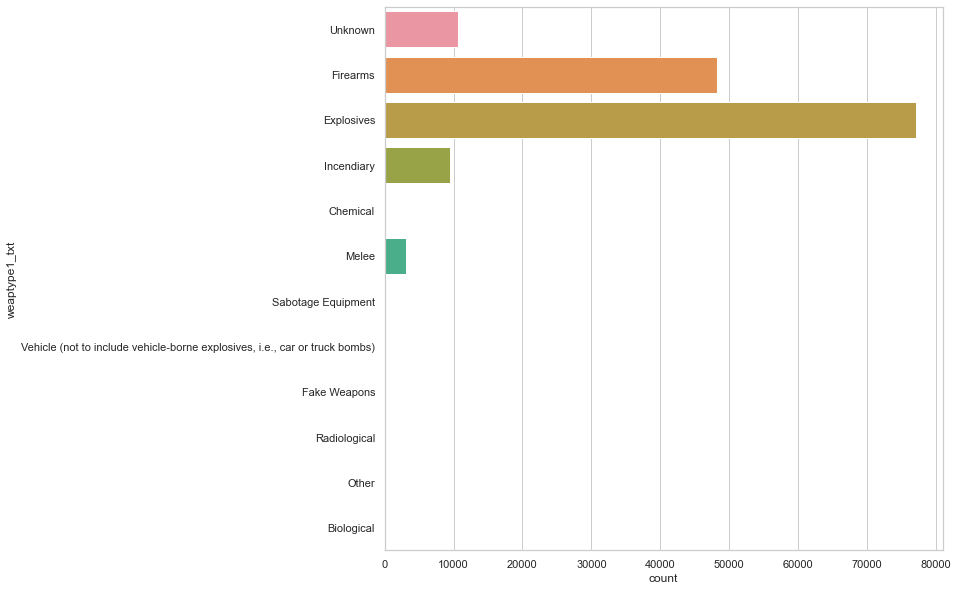

In [424]:
sns.countplot(y = df['weaptype1_txt'])

In [425]:
df['weapsubtype1_txt'].unique()

array(['Unknown Explosive Type', 'Unknown Gun Type',
       'Automatic or Semi-Automatic Rifle',
       'Molotov Cocktail/Petrol Bomb', 'Gasoline or Alcohol',
       'Rifle/Shotgun (non-automatic)', 'Arson/Fire', 'Pipe Bomb',
       'Vehicle', 'Dynamite/TNT', 'Pressure Trigger', 'Time Fuse',
       'Other Explosive Type', 'Poisoning',
       'Projectile (rockets, mortars, RPGs, etc.)', 'Handgun',
       'Letter Bomb', 'Blunt Object', 'Sticky Bomb', 'Grenade',
       'Knife or Other Sharp Object', 'Hands, Feet, Fists', 'Landmine',
       'Explosive', 'Rope or Other Strangling Device',
       'Unknown Weapon Type', 'Remote Trigger', 'Suffocation',
       'Suicide (carried bodily by human being)', 'Other Gun Type'],
      dtype=object)

In [426]:
df['nkill'].describe()

count    149355.000000
mean          2.160149
std          10.018203
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1384.000000
Name: nkill, dtype: float64

<AxesSubplot:xlabel='nkill', ylabel='Density'>

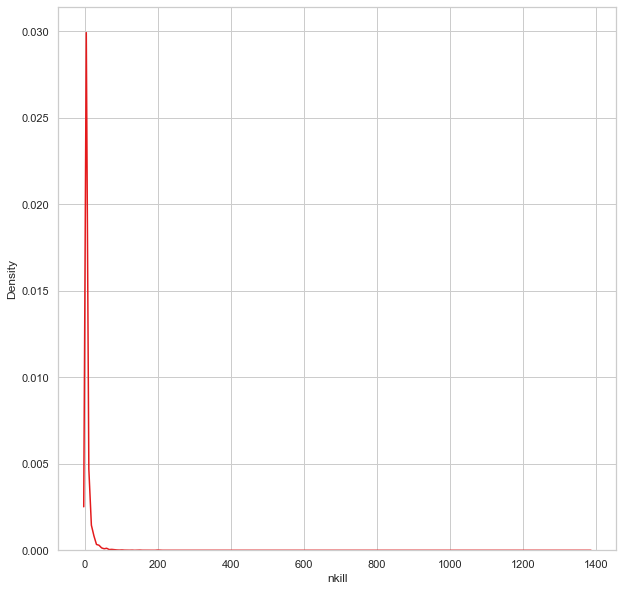

In [427]:
sns.kdeplot(df['nkill'])

In [428]:
df[df['nkill'] > 100]

,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,vicinity,...,weaptype1_txt,weapsubtype1_txt,nkill,nwound,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
4106,1978,8,19,0,Iran,Middle East & North Africa,Abadan,30.345997,48.287136,0,...,Incendiary,Unknown Explosive Type,422.0,0.0,1,0.0,0,1,0,1
7657,1980,8,15,0,El Salvador,Central America & Caribbean,Suchitoto,13.933732,-89.025836,0,...,Firearms,Automatic or Semi-Automatic Rifle,300.0,0.0,1,0.0,-9,-9,0,-9
11928,1983,4,18,0,Nicaragua,Central America & Caribbean,Ocotal,13.633250,-86.476299,0,...,Firearms,Automatic or Semi-Automatic Rifle,120.0,0.0,1,0.0,0,0,0,0
12005,1983,5,8,1,El Salvador,Central America & Caribbean,Cinquera,13.883333,-88.966667,0,...,Firearms,Automatic or Semi-Automatic Rifle,120.0,0.0,1,1.0,0,0,0,0
12018,1983,5,11,0,El Salvador,Central America & Caribbean,Cinquera,13.883333,-88.966667,0,...,Firearms,Automatic or Semi-Automatic Rifle,102.0,0.0,1,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144320,2017,6,1,0,Iraq,Middle East & North Africa,Mosul,36.354145,43.143570,0,...,Firearms,Rifle/Shotgun (non-automatic),163.0,0.0,0,0.0,0,1,0,1
145236,2017,6,4,1,Iraq,Middle East & North Africa,Tal Afar,36.376823,42.448875,0,...,Unknown,Unknown Explosive Type,200.0,0.0,0,1.0,0,1,0,1
147659,2017,10,2,1,Syria,Middle East & North Africa,Qaryatayn,34.227745,37.244217,0,...,Firearms,Unknown Gun Type,128.0,0.0,-9,1.0,0,1,0,1
147708,2017,10,14,0,Somalia,Sub-Saharan Africa,Mogadishu,2.059819,45.326115,0,...,Explosives,Vehicle,588.0,316.0,1,0.0,0,1,1,1


In [429]:
df['nwound'].describe()

count    149355.000000
mean          3.294988
std          37.691791
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        8191.000000
Name: nwound, dtype: float64

<AxesSubplot:xlabel='nwound', ylabel='Density'>

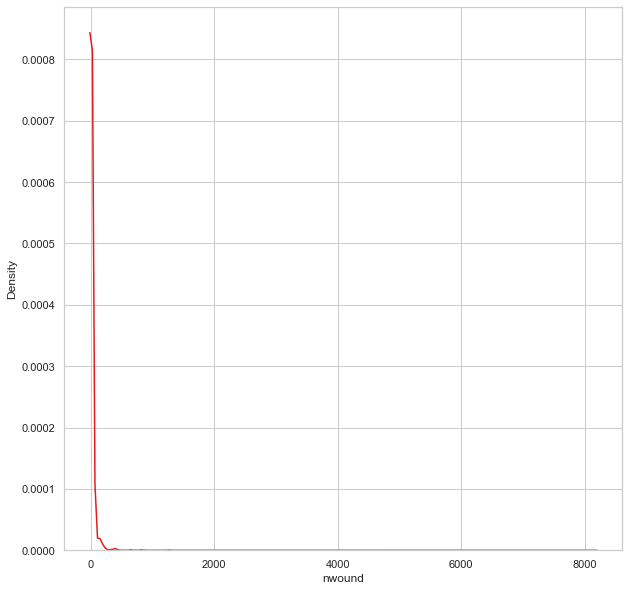

In [430]:
sns.kdeplot(df['nwound'])

In [431]:
df['property'].unique()

array([ 0,  1, -9], dtype=int64)

<AxesSubplot:xlabel='property', ylabel='count'>

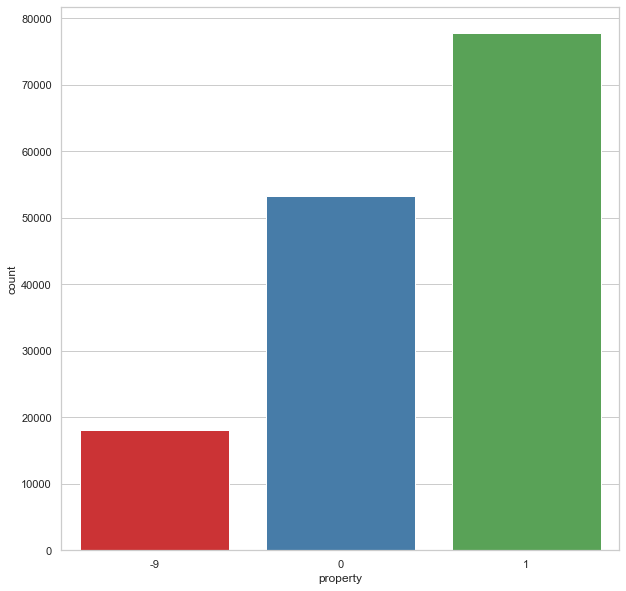

In [432]:
sns.countplot(df['property']) # make property damadge

In [433]:
df['ishostkid'].unique()

array([ 1.,  0., -9.])

<AxesSubplot:xlabel='ishostkid', ylabel='count'>

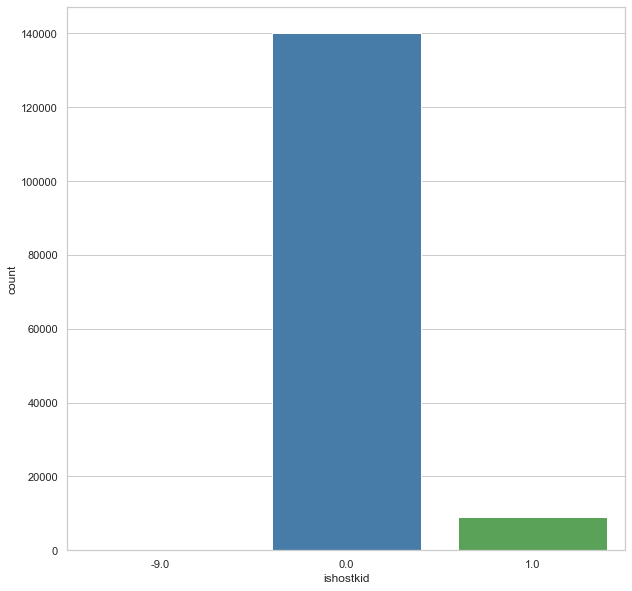

In [434]:
sns.countplot(df['ishostkid'])

In [438]:
df['INT_LOG'].unique()

array([ 0, -9,  1], dtype=int64)

<AxesSubplot:xlabel='INT_LOG', ylabel='count'>

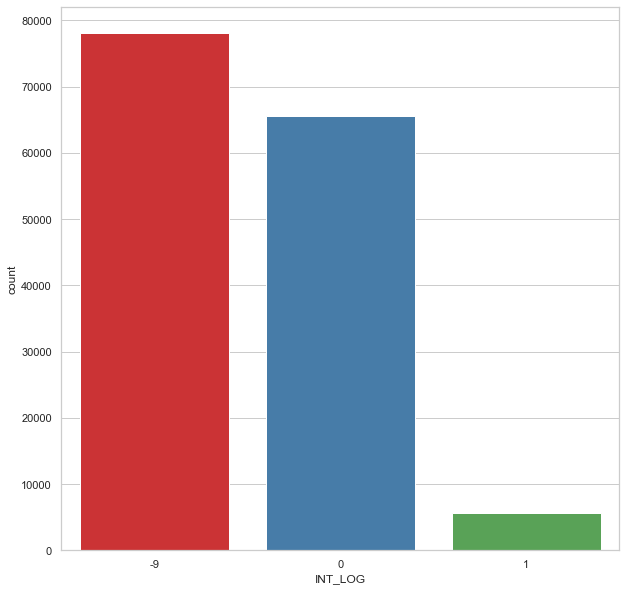

In [439]:
sns.countplot(df['INT_LOG'])

In [441]:
df['INT_IDEO'].unique()

array([ 1, -9,  0], dtype=int64)

<AxesSubplot:xlabel='INT_IDEO', ylabel='count'>

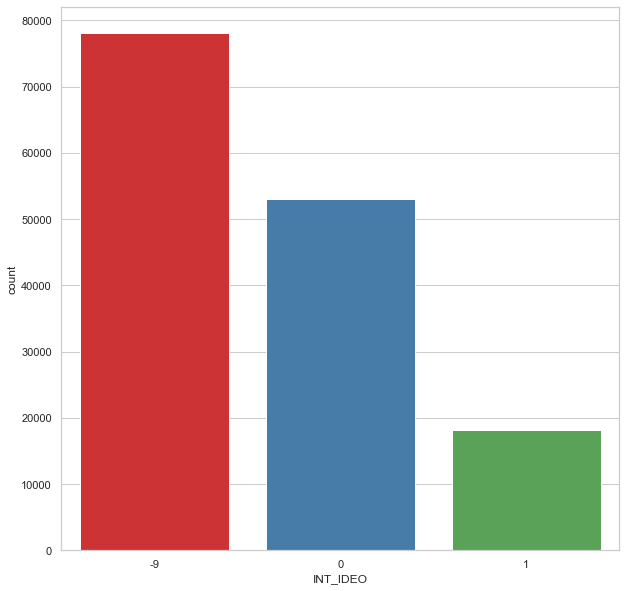

In [442]:
sns.countplot(df['INT_IDEO'])

<AxesSubplot:xlabel='INT_MISC', ylabel='count'>

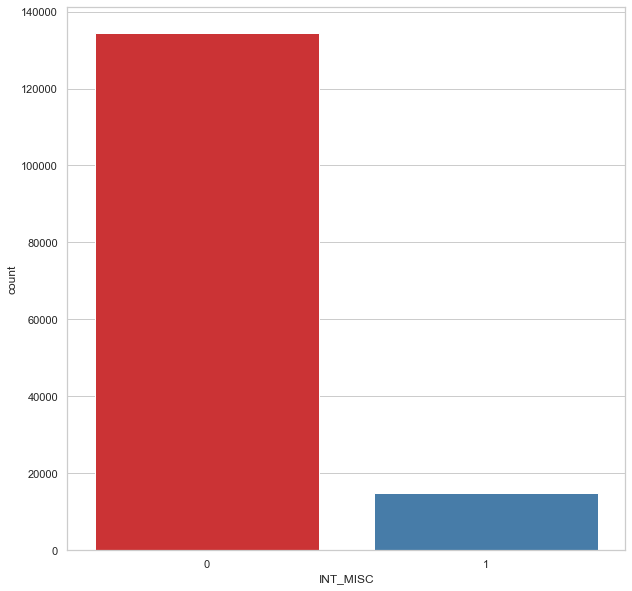

In [444]:
sns.countplot(df['INT_MISC'])

<AxesSubplot:xlabel='INT_ANY', ylabel='count'>

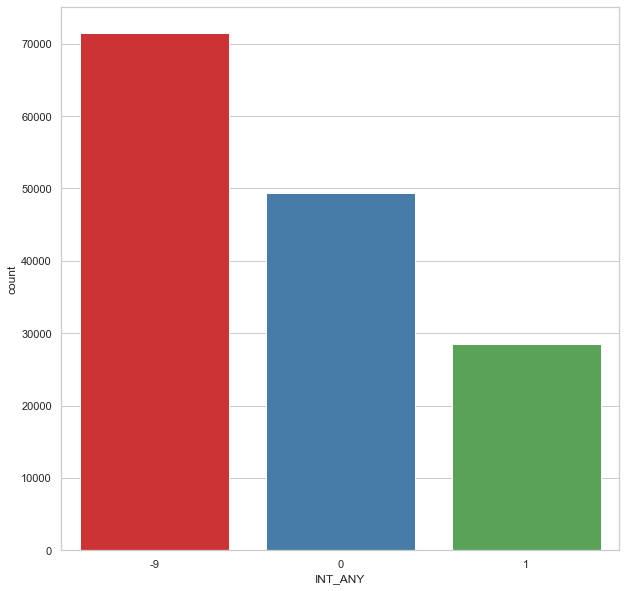

In [445]:
sns.countplot(df['INT_ANY'])

In [461]:
sns.set_theme(context = 'notebook' , style = 'whitegrid' , palette = 'Paired', 
             rc = {'figure.figsize' : (10 , 5)})

## Bivariate Analysi

### 1- For Last 10 Years In Which Year That Have More Terrorism Accedent ?

In [462]:
lst10_years = sorted(df['iyear'].unique())[-10:]

In [463]:
df[df['iyear'].isin(lst10_years)]['iyear'].value_counts()

2014    13914
2015    12317
2016    11153
2013    10862
2017     8768
2012     7638
2011     4697
2010     4563
2009     4259
2008     4194
Name: iyear, dtype: int64

<AxesSubplot:xlabel='count', ylabel='iyear'>

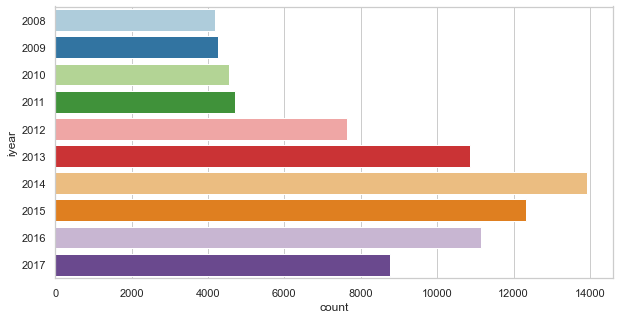

In [464]:
sns.countplot(data = df[df['iyear'].isin(lst10_years)] , y = 'iyear')

### 2- For Yeay = 2014 Which Month Have More Terrorism ? 

In [479]:
df[df['iyear'] == 2014]['imonth'].value_counts()

7     1392
5     1389
3     1267
4     1223
2     1217
1     1187
6     1125
8     1087
10    1083
9     1042
11     982
12     920
Name: imonth, dtype: int64

<AxesSubplot:xlabel='count', ylabel='imonth'>

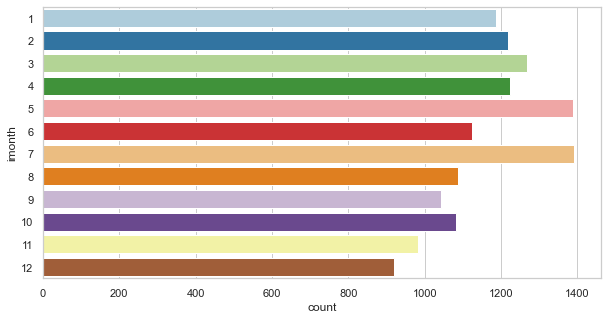

In [480]:
sns.countplot(data = df[df['iyear'] == 2014] , y = 'imonth')

### 3- What Is Most Region Have Terrorism ?

In [467]:
df['region_txt'].value_counts()

Middle East & North Africa     42533
South Asia                     39187
South America                  15503
Sub-Saharan Africa             13318
Western Europe                 12675
Southeast Asia                 10552
Central America & Caribbean     6707
Eastern Europe                  4536
North America                   2958
East Asia                        660
Central Asia                     492
Australasia & Oceania            234
Name: region_txt, dtype: int64

<AxesSubplot:xlabel='count', ylabel='region_txt'>

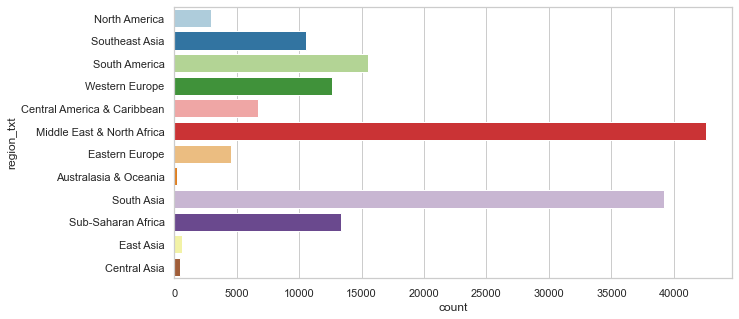

In [469]:
sns.countplot(y = df['region_txt'])

### 4- For Middle East What is Most Country Has Terrorism ?

In [471]:
df[df['region_txt'] == 'Middle East & North Africa']['country_txt'].value_counts()

Iraq                        21510
Turkey                       3767
Yemen                        2747
Egypt                        2151
Lebanon                      1996
Algeria                      1978
West Bank and Gaza Strip     1974
Libya                        1825
Israel                       1755
Syria                        1516
Iran                          517
Saudi Arabia                  314
Bahrain                       174
Tunisia                       100
Jordan                        100
Kuwait                         55
Morocco                        23
United Arab Emirates           17
Qatar                           6
North Yemen                     4
Western Sahara                  2
South Yemen                     1
International                   1
Name: country_txt, dtype: int64

<AxesSubplot:xlabel='count', ylabel='country_txt'>

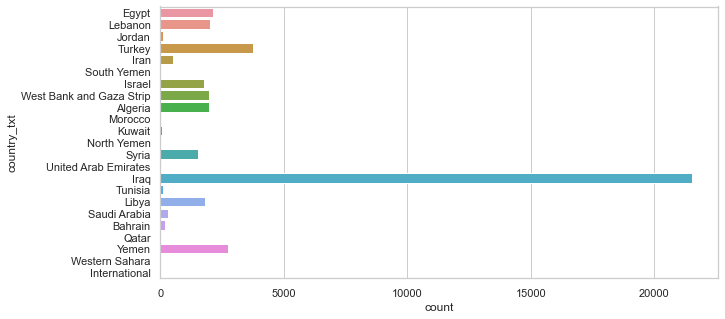

In [472]:
sns.countplot(data = df[df['region_txt'] == 'Middle East & North Africa'] , y = 'country_txt')

### 5- For Iraq Country Which City Has More Terrorism ?

In [476]:
idx = df[df['country_txt'] == 'Iraq']['city'].value_counts().head().index
df[df['country_txt'] == 'Iraq']['city'].value_counts().head()

Baghdad     7001
Mosul       1912
Kirkuk       851
Baqubah      692
Fallujah     525
Name: city, dtype: int64

<AxesSubplot:xlabel='city', ylabel='count'>

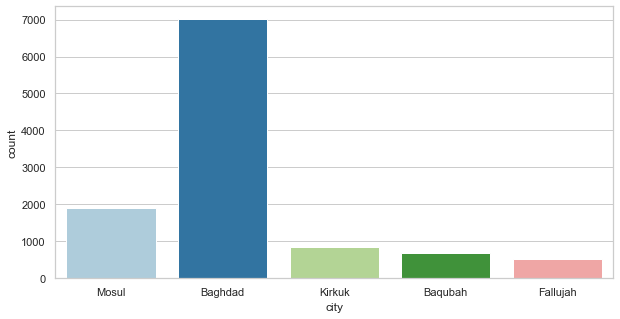

In [477]:
sns.countplot(data = df[df['city'].isin(idx)] , x = 'city')

### 6- Top 5 Targets That The Terrorism Operation Extended More Than 24 Hours ? 

In [505]:
idx = df[df['extended'] ==  1]['target1'].value_counts().head().index

<AxesSubplot:xlabel='count', ylabel='target1'>

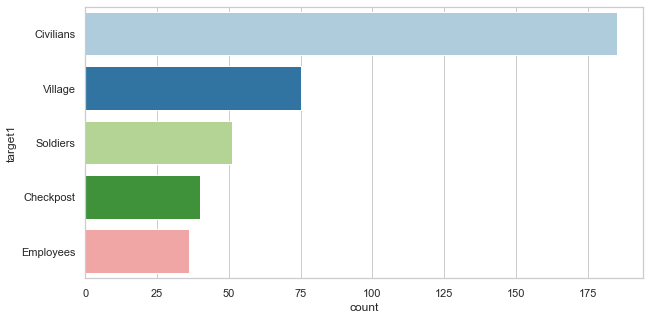

In [506]:
sns.countplot(data = df[(df['extended'] == 1) & (df['target1'].isin(idx))], y = 'target1' , order = idx)

### 7- For Each Region Which Attack Type Is Most ?

In [513]:
df['dummy'] = 1

In [517]:
pivt = pd.pivot_table(data = df , index = 'region_txt' , columns = 'attacktype1_txt' , values = 'dummy' , aggfunc = sum)
pivt

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
region_txt,,,,,,,,,
Australasia & Oceania,42,28,59,62,3,4,12,10,14
Central America & Caribbean,2638,1088,2110,237,16,134,247,17,220
Central Asia,102,99,208,18,7,1,38,4,15
East Asia,105,50,276,148,13,3,8,39,18
Eastern Europe,1153,358,2442,235,22,15,164,54,93
Middle East & North Africa,8252,3875,26170,996,97,82,1473,150,1438
North America,385,236,1251,840,14,52,92,64,24
South America,3184,2434,7388,661,48,187,991,42,568
South Asia,10489,3940,18093,2032,75,97,2441,271,1749


<AxesSubplot:xlabel='attacktype1_txt', ylabel='region_txt'>

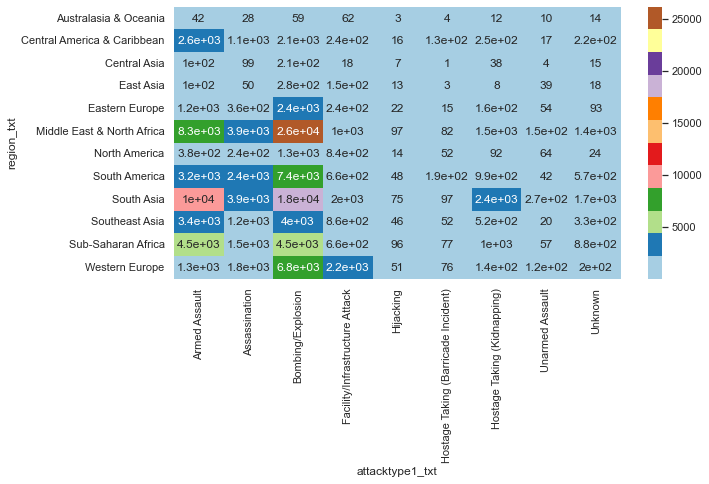

In [522]:
sns.heatmap(pivt , annot = True , cmap = 'Paired')

### 8- In Middle East What Is Weapon Type That Most Used ?

In [526]:
df[df['region_txt'] == 'Middle East & North Africa']['weaptype1_txt'].value_counts()

Explosives                                                                     27454
Firearms                                                                       10358
Unknown                                                                         2471
Melee                                                                           1052
Incendiary                                                                      1042
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       67
Chemical                                                                          57
Other                                                                             21
Sabotage Equipment                                                                 6
Fake Weapons                                                                       5
Name: weaptype1_txt, dtype: int64

<AxesSubplot:xlabel='count', ylabel='weaptype1_txt'>

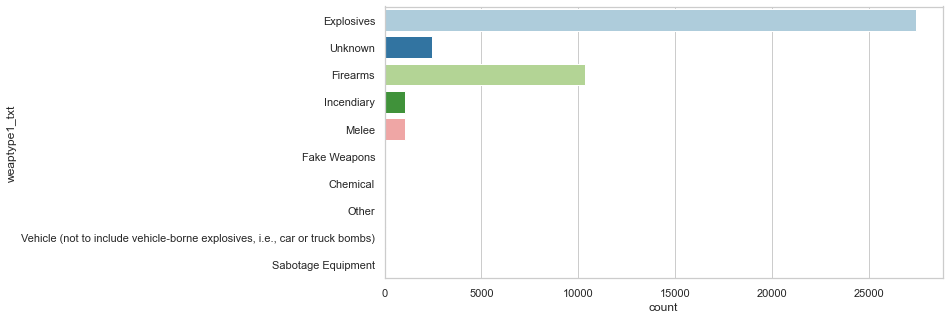

In [527]:
sns.countplot(data = df[df['region_txt'] == 'Middle East & North Africa'] , y = 'weaptype1_txt')

### 9- For Individual operation What Is Most Weabon That Used ?

In [530]:
df[df['individual'] == 1]['weaptype1_txt'].value_counts()

Firearms                                                                       154
Explosives                                                                     122
Melee                                                                           91
Incendiary                                                                      84
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)     22
Biological                                                                      14
Fake Weapons                                                                     7
Unknown                                                                          6
Chemical                                                                         4
Sabotage Equipment                                                               2
Other                                                                            1
Name: weaptype1_txt, dtype: int64

<AxesSubplot:xlabel='count', ylabel='weaptype1_txt'>

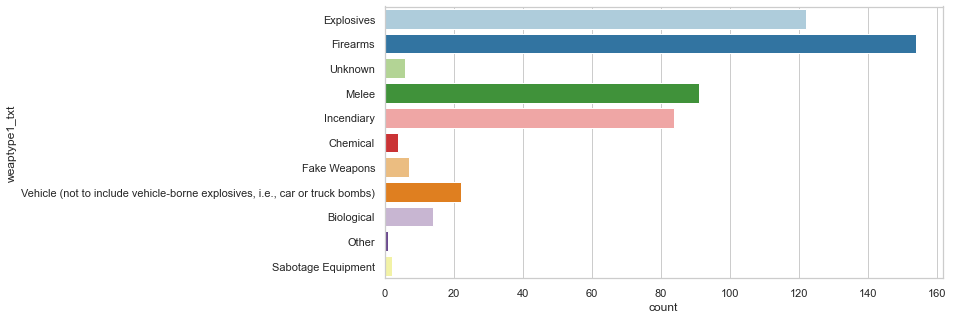

In [531]:
sns.countplot(data = df[df['individual'] == 1] , y = 'weaptype1_txt')

### 10- In Middle East What Is The Group Name Perform Most Terrorism

In [535]:
idx = df[df['region_txt'] == 'Middle East & North Africa']['gname'].value_counts().head().index
df[df['region_txt'] == 'Middle East & North Africa']['gname'].value_counts().head()

Unknown                                        25478
Islamic State of Iraq and the Levant (ISIL)     4441
Kurdistan Workers' Party (PKK)                  1904
Al-Qaida in the Arabian Peninsula (AQAP)         885
Palestinians                                     872
Name: gname, dtype: int64

<AxesSubplot:xlabel='count', ylabel='gname'>

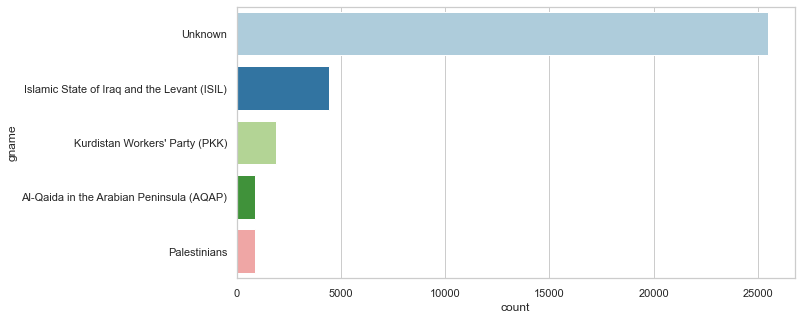

In [541]:
sns.countplot(data = df[(df['region_txt'] == 'Middle East & North Africa')&(df['gname'].isin(idx)) ] , y = 'gname' , order = idx)

### 11- Which Attack Type Cause More killed People ?

In [548]:
df.groupby('attacktype1_txt')['nkill'].agg([np.sum]).sort_values(by = 'sum' , ascending = False)

,sum
attacktype1_txt,
Bombing/Explosion,133078.0
Armed Assault,122114.0
Unknown,22765.0
Assassination,21112.0
Hostage Taking (Kidnapping),13465.0
Hostage Taking (Barricade Incident),3467.0
Hijacking,3407.0
Facility/Infrastructure Attack,2486.0
Unarmed Assault,735.0


<AxesSubplot:xlabel='nkill', ylabel='attacktype1_txt'>

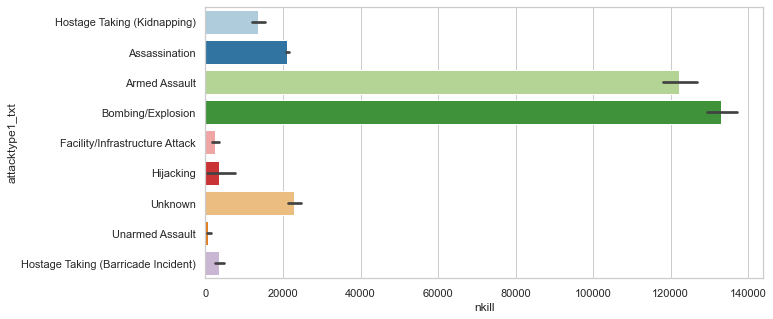

In [550]:
sns.barplot(data = df , y = 'attacktype1_txt' , x = 'nkill' , estimator = np.sum)

### 12 - Average wounded People For Attacking Type ?

In [561]:
round(df.groupby(['attacktype1_txt'])['nwound'].agg([np.mean]))

,mean
attacktype1_txt,
Armed Assault,2.0
Assassination,1.0
Bombing/Explosion,5.0
Facility/Infrastructure Attack,0.0
Hijacking,34.0
Hostage Taking (Barricade Incident),5.0
Hostage Taking (Kidnapping),1.0
Unarmed Assault,16.0
Unknown,2.0


<AxesSubplot:xlabel='nwound', ylabel='attacktype1_txt'>

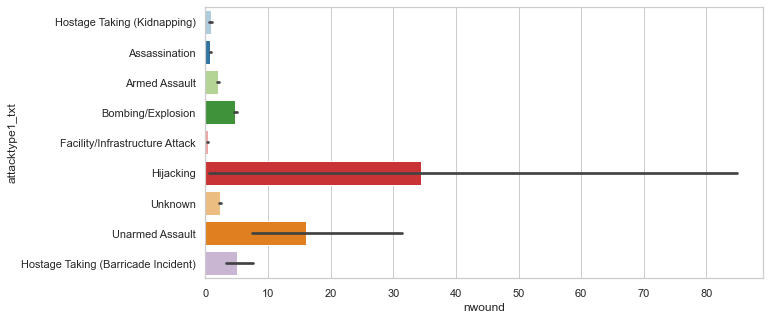

In [563]:
sns.barplot(data = df , y = 'attacktype1_txt' , x = 'nwound' , estimator = np.mean)

### 13- What Is Most Attack Type That Cause Property Damage ? 

In [568]:
df[df['property'] == 1 ]['attacktype1_txt'].value_counts()

Bombing/Explosion                      46487
Armed Assault                          16381
Facility/Infrastructure Attack          8392
Assassination                           2757
Unknown                                 2089
Hostage Taking (Kidnapping)              692
Hostage Taking (Barricade Incident)      568
Unarmed Assault                          333
Hijacking                                169
Name: attacktype1_txt, dtype: int64

<AxesSubplot:xlabel='count', ylabel='attacktype1_txt'>

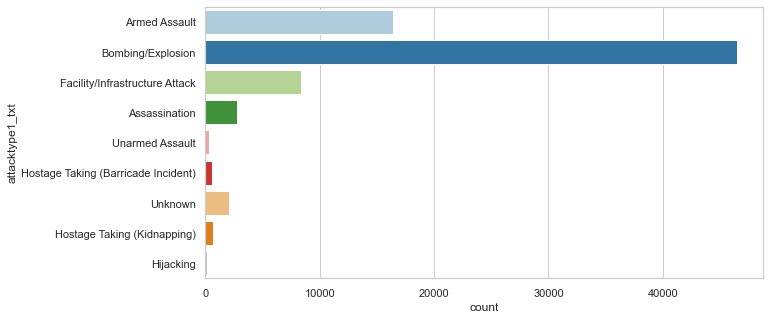

In [569]:
sns.countplot(data = df[df['property'] == 1 ] , y = 'attacktype1_txt')

### 14- What Is Most Attack Type Cause hostage or kidnapped  ? 

In [574]:
df[df['ishostkid'] == 1 ]['attacktype1_txt'].value_counts()

Hostage Taking (Kidnapping)            6946
Hostage Taking (Barricade Incident)     640
Armed Assault                           607
Hijacking                               309
Assassination                           212
Bombing/Explosion                        99
Facility/Infrastructure Attack           63
Unknown                                  45
Unarmed Assault                           3
Name: attacktype1_txt, dtype: int64

<AxesSubplot:xlabel='count', ylabel='attacktype1_txt'>

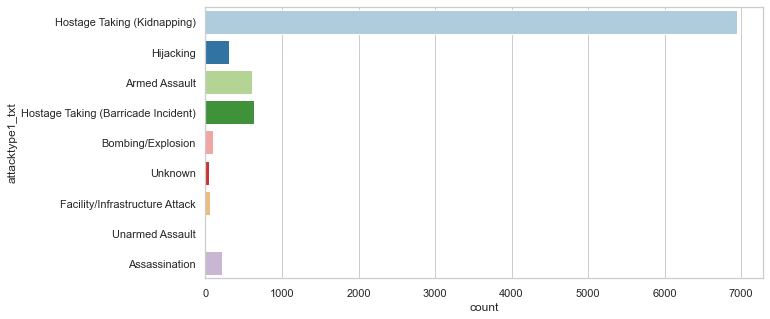

In [575]:
sns.countplot(data = df[df['ishostkid'] == 1 ] , y = 'attacktype1_txt')

### 15- Over The Years, The Rate Of Terrorism Has Increased Or Decreased ?

<AxesSubplot:>

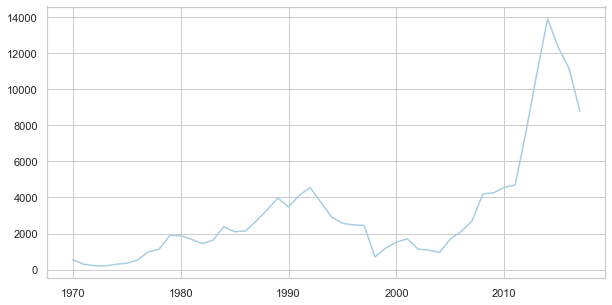

In [583]:
sns.lineplot( x = df['iyear'].value_counts().index , y = df['iyear'].value_counts().values)

In [586]:
df.to_csv('Terrorism.csv' , index = False)